## Introduction to NetworkX

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np


G = nx.Graph()

G.add_nodes_from([1, 2, 3, 4, 5, 6])

G.nodes()

NodeView((1, 2, 3, 4, 5, 6))

In [3]:
G.add_edge(1,2)
G.add_edge(1,3)
G.add_edge(1,4)

G.edges()

EdgeView([(1, 2), (1, 3), (1, 4)])

In [4]:
G.nodes[1]["color"] = "blue"


G.nodes[1]['x'] = 8

G.nodes(data=True)

NodeDataView({1: {'color': 'blue', 'x': 8}, 2: {}, 3: {}, 4: {}, 5: {}, 6: {}})

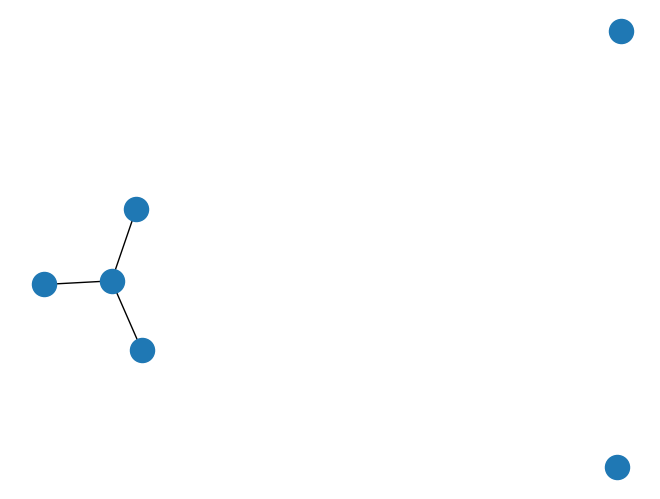

In [5]:
nx.draw(G)

plt.show()

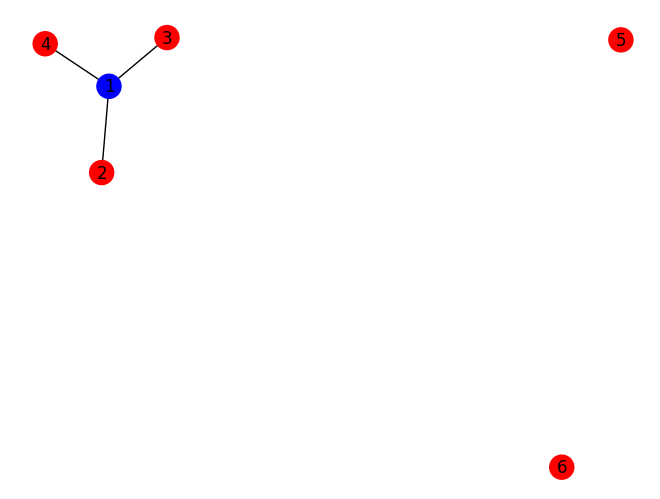

In [6]:
# prompt: draw with the labels and metadata

import networkx as nx
import matplotlib.pyplot as plt


G = nx.Graph()

G.add_nodes_from([1, 2, 3, 4, 5, 6])

G.nodes()
G.add_edge(1,2)
G.add_edge(1,3)
G.add_edge(1,4)

G.edges()
# # Importing metadata
G.nodes[1]["color"] = "blue"


G.nodes[1]['x'] = 8

node_labels = {node: str(node) for node in G.nodes()}
node_colors = [data.get("color", "red") for _, data in G.nodes(data=True)]

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, labels=node_labels, node_color=node_colors)

plt.show()

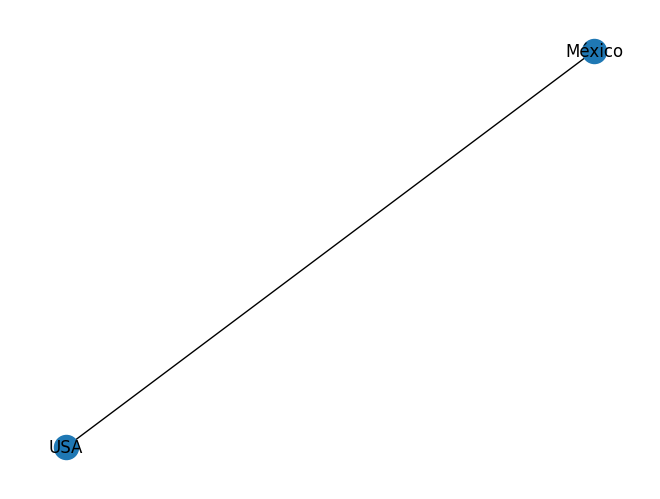

In [7]:
L = nx.Graph()

L.add_nodes_from(["México", "USA"])

L.add_edge("México", "USA")

nx.draw(L, with_labels = True)
plt.show()

# Watts and Strogatz results

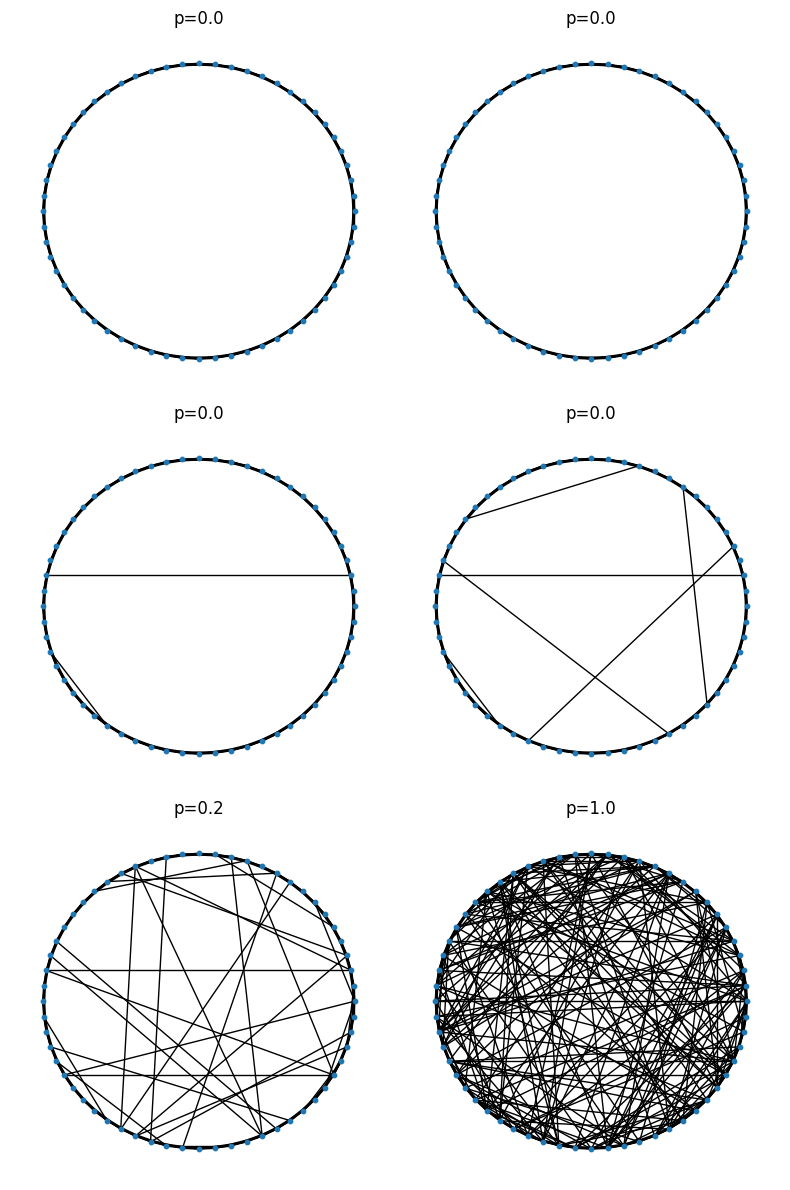

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Set the number of subplots
num_plots = 6
fig, axes = plt.subplots(3, 2, figsize=(8, 12))
axes = axes.flatten()

# Loop through the values of p and plot each graph in a subplot
for idx, p in enumerate(np.logspace(-4, 0, num_plots)):
    small_world = nx.newman_watts_strogatz_graph(n=60, k=6, p=p, seed=1)
    nx.draw_circular(small_world, node_size=10, ax=axes[idx])
    axes[idx].set_title(f'p={p:.1f}')



# plt.subplots_adjust(hspace=0.2, wspace=0.8)
plt.tight_layout()
plt.show()

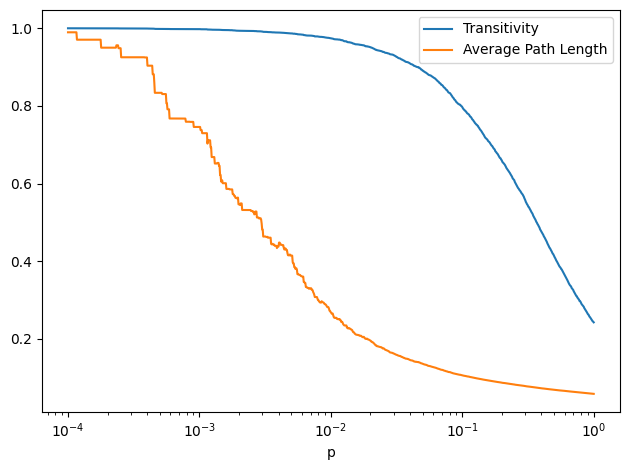

In [24]:


transitivity = []
average_path_length = []
p_values = np.logspace(-4, 0, 1000)
small_world_graphs = []

# Compute the transitivity and average length path for each graph
for p in p_values:
    small_world_graphs = []
    for seed in range(10):
        small_world_graphs.append(nx.newman_watts_strogatz_graph(n=600, k=6, p=p, seed=seed))
    
    transitivities = list(map(lambda x: nx.transitivity(x) / 0.6, small_world_graphs))
    avg_lenghts = list(map(lambda x: nx.average_shortest_path_length(x) / 50, small_world_graphs))  
    
    
    transitivity.append(np.mean(transitivities))
    average_path_length.append(np.mean(avg_lenghts))

# Plot the results
plt.plot(p_values, transitivity, label='Transitivity')
plt.plot(p_values, average_path_length, label='Average Path Length', )
plt.xlabel('p')
plt.xscale('log')
plt.legend()
plt.tight_layout()
plt.show()


# Model applied to Mexico City

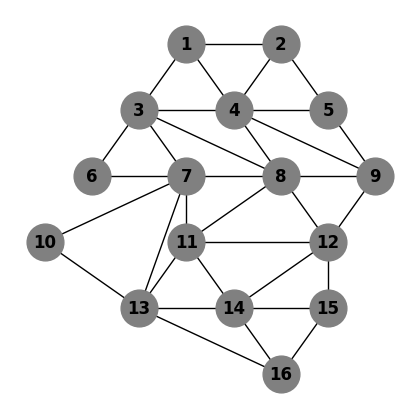

In [187]:
import numpy as np
import scipy as sp
import networkx as nx
import matplotlib.pyplot as plt

# Create an empty graph
G = nx.Graph()

# Add nodes
nodes = range(1, 17)
G.add_nodes_from(nodes)

# Add edges based on the visual structure
edges = [
    (1, 2), (1, 3), (1, 4), (2, 4), (2,5), (3, 4), (3, 6), (3, 7), (3, 8), (4, 5), (4, 8), (4, 9),
    (5, 9), (6, 7), (7, 8), (7, 11), (7, 10), (7, 13), (8, 9), (8, 11), (8, 12), (9, 12),
    (10, 13), (11, 12), (11, 13), (11, 14), (12, 14), (12, 15), (13, 14), (13, 16) ,(14, 15),
    (14, 16), (15, 16)
]
G.add_edges_from(edges)

# Approximate positions for each node based on the image
positions = {
    1: (0.5, 3.5), 2: (1.5, 3.5), 3: (0, 2.5), 4: (1, 2.5), 5: (2, 2.5),
    6: (-0.5, 1.5), 7: (0.5, 1.5), 8: (1.5, 1.5), 9: (2.5, 1.5),
    10: (-1, 0.5), 11: (0.5, 0.5), 12: (2, 0.5), 13: (0, -0.5),
    14: (1, -0.5), 15: (2, -0.5), 16: (1.5, -1.5)
}

# Draw the graph
plt.figure(figsize=(4, 4))
nx.draw(G, pos=positions, with_labels=True, node_color='gray', edge_color='black', node_size=700, font_weight='bold')
plt.show()



In [188]:
# Get the adjacency matrix as a numpy array
A = nx.adjacency_matrix(G).todense()
print(A)
print(type(A))
# Check if the matrix is symmetric
print(np.allclose(A, A.T))

[[0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0]
 [1 1 1 0 1 0 0 1 1 0 0 0 0 0 0 0]
 [0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 1 0 1 0 1 1 0 1 0 0 0]
 [0 0 1 1 0 0 1 0 1 0 1 1 0 0 0 0]
 [0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 0]
 [0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 0]
 [0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 1]
 [0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 1]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0]]
<class 'numpy.ndarray'>
True


In [190]:
# Define the system of ODEs
alpha = 0.0050415
beta = 0.000013047
delta = 0.0079639
do = 0.0017783
numerator = 2 * delta**2 * beta + do * (alpha + beta)**2 + 2 * (alpha + beta) * delta * np.sqrt(2 * do * (alpha + beta))
denominator = 2 * alpha * delta**2
Ic = numerator / denominator
I = Ic

# Critical eigenvalue, must be 1.19198455
lambda_c = (do * (alpha + beta)**2 + 2 * beta * delta**2 - 2 * I * alpha * delta**2) / (4 * do * delta * (alpha + beta))
print("Critical eigenvalue: ", lambda_c)


# Compute the homogeneous steady states
rho_ss = alpha * delta / (alpha + beta)
O_ss = (alpha + beta) / delta

print("rho_ss: ", rho_ss)
print("O_ss: ", O_ss)

Critical eigenvalue:  -1.1921299735869972
rho_ss:  0.007943343261028139
O_ss:  0.6346823792363039


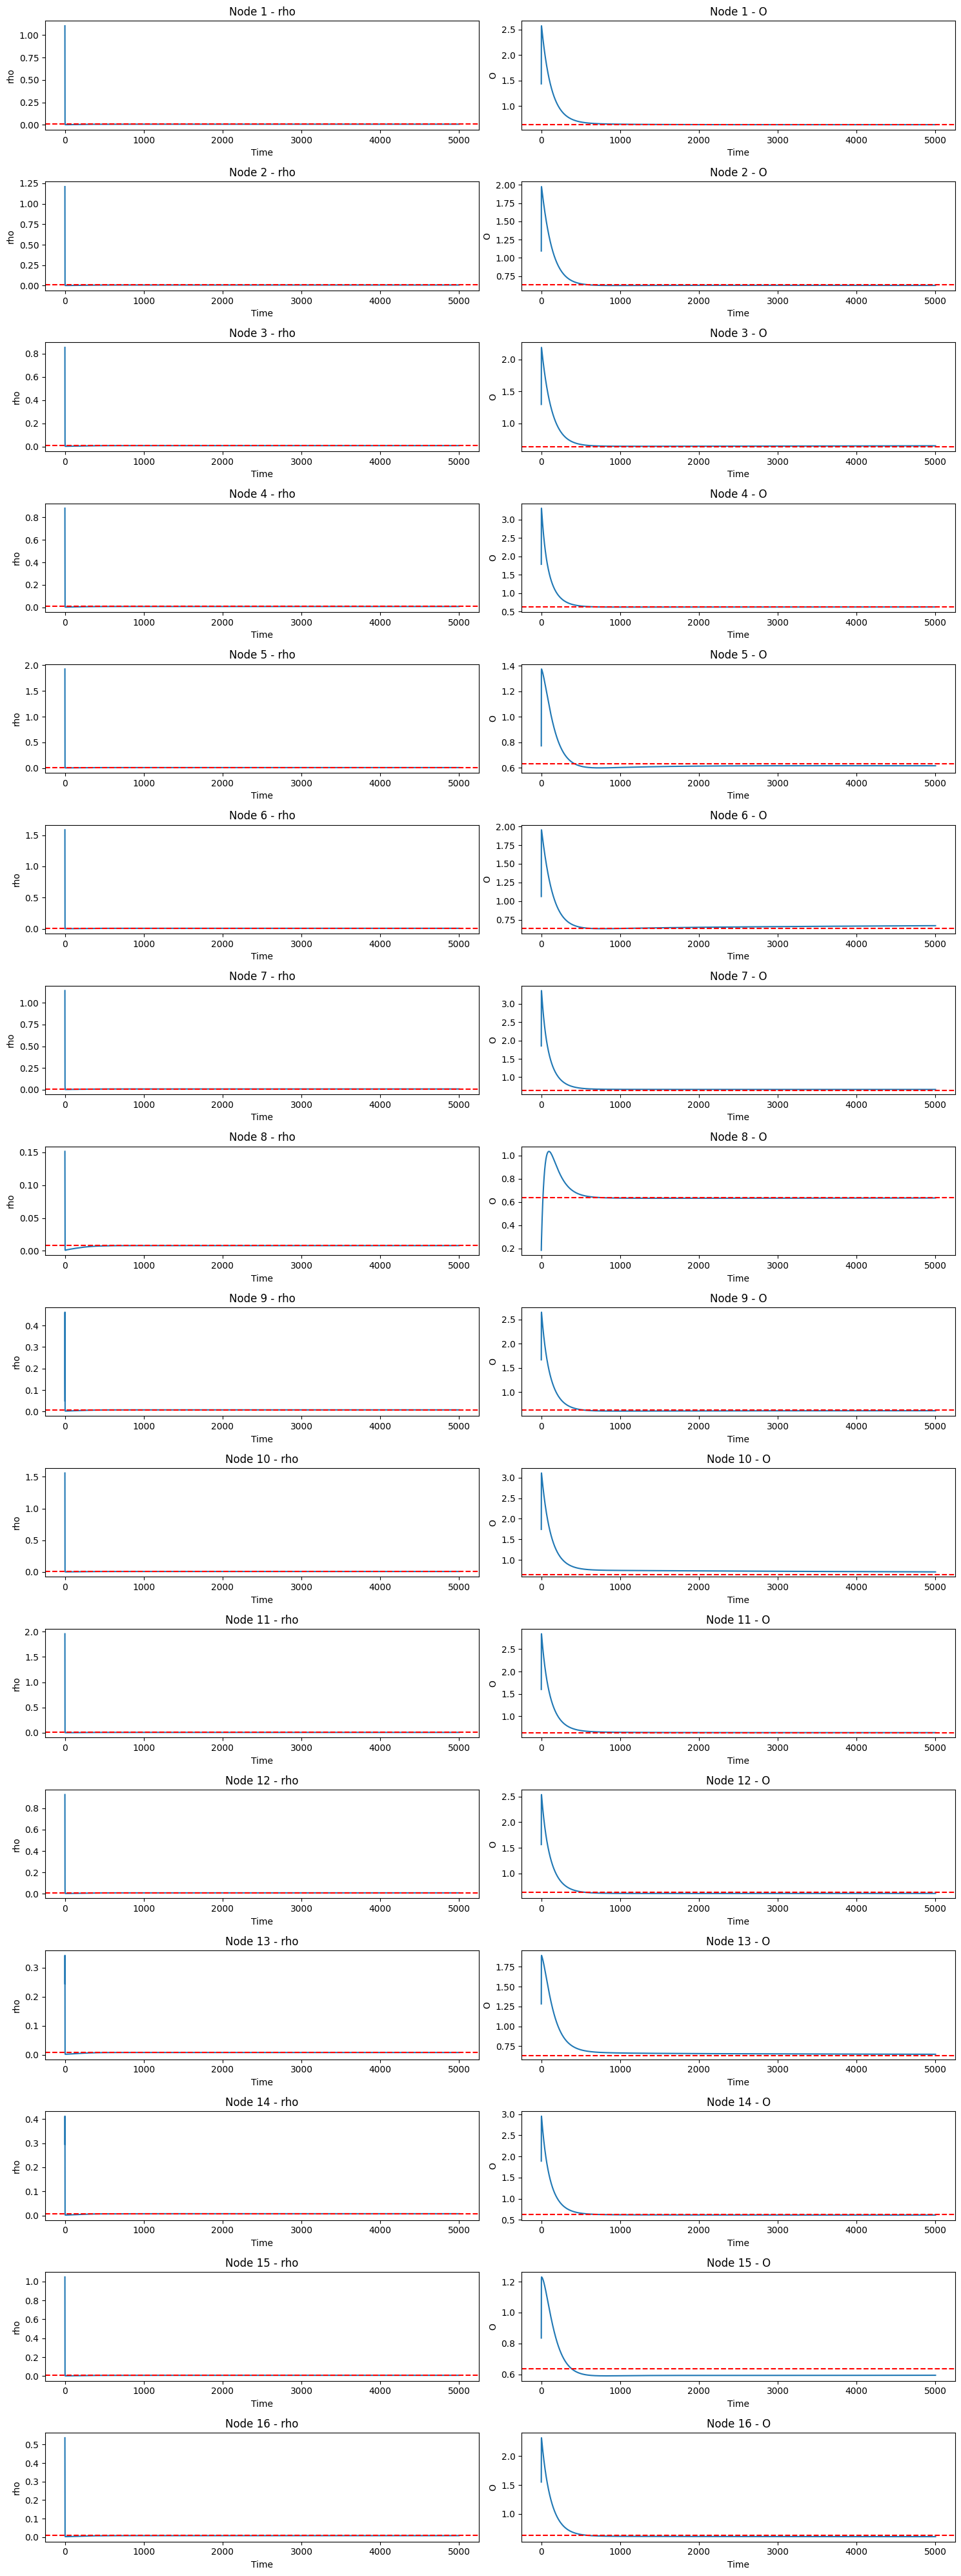

In [191]:




def system(t, y, A, alpha, beta, delta, do, I):
    """
    y[k][0] is rho
    y[k][1] is O
    16 repetitions for each municipality
    2 variables, rho and O
    """


    y = y.reshape(16, 2)
    
    dydt = np.zeros_like(y)

    

    def function_1(j):
        return A[i][j] * (y[j][0] - y[i][0])
    
    def function_2(j):
        return A[i][j] * ((y[i][1]/y[j][1])**I * y[j][0] - (y[j][1]/y[i][1])**I * y[i][0])
    
    def function_3(j):
        return A[i][j] * (y[j][1] - y[i][1])
    
    j = np.arange(16)
    

    for i in range(16):
        f_1_j = np.vectorize(function_1)(j)
        f_2_j = np.vectorize(function_2)(j)
        f_3_j = np.vectorize(function_3)(j)
        dydt[i, 0] = -y[i, 0] * y[i, 1] + alpha + np.sum(f_1_j) + np.sum(f_2_j)
        dydt[i, 1] = -delta * y[i, 1] + beta + y[i, 0] * y[i, 1] + do * np.sum(f_3_j)

    return dydt.flatten()
    


# Initial conditions
np.random.seed(0)
y0 = np.random.uniform(0.01, 2, 32)

# Time span
t_span = (0, 5000)
t_eval = np.linspace(*t_span, 10000)

# Solve the system of ODEs
solution = sp.integrate.solve_ivp(system, t_span, y0, args=(A, alpha, beta, delta, do, I), t_eval=t_eval)

t = solution.t
y = solution.y.reshape(16, 2, -1)

# Plot the results using subplots
fig, axes = plt.subplots(16, 2, figsize=(15, 40))

for i in range(16):
    axes[i, 0].plot(t, y[i, 0])
    axes[i, 0].set_xlabel('Time')
    axes[i, 0].set_ylabel('rho')
    axes[i, 0].set_title(f'Node {i + 1} - rho')
    # plot the steady state
    axes[i, 0].axhline(rho_ss, color='red', linestyle='--')

    axes[i, 1].plot(t, y[i, 1])
    axes[i, 1].set_xlabel('Time')
    axes[i, 1].set_ylabel('O')
    axes[i, 1].set_title(f'Node {i + 1} - O')
    # plot the steady state
    axes[i, 1].axhline(O_ss, color='red', linestyle='--')

plt.tight_layout()
plt.show()
    


In [192]:
y.shape

(16, 2, 10000)

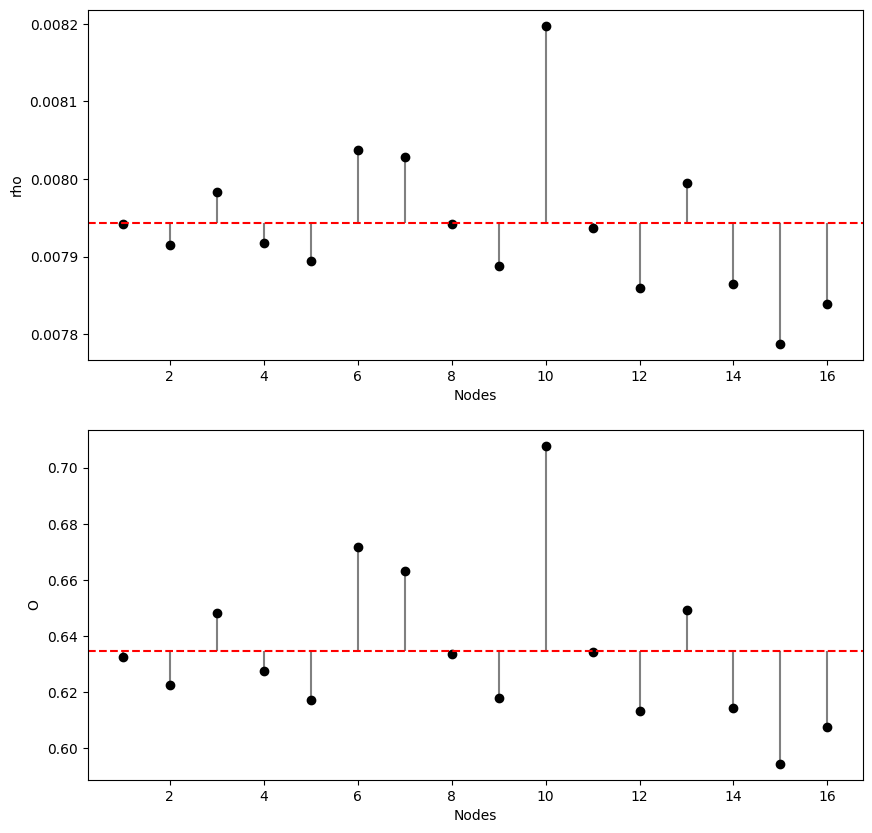

In [198]:
import matplotlib.pyplot as plt
import numpy as np

# Example data
nodes = np.arange(1, 17)
last_values_rho = np.zeros(16)
last_values_O = np.zeros(16)
for i in range(16):
    last_values_rho[i] = y[i, 0][-1]
    last_values_O[i] = y[i, 1][-1]

# Creating the stem plots
fig, axes = plt.subplots(2, 1, figsize=(10, 10))

axes[0].stem(nodes, last_values_rho, linefmt='gray', markerfmt='ko', basefmt=' ', bottom=rho_ss)
axes[0].axhline(rho_ss, color='red', linestyle='--')


# Labeling the axes
axes[0].set_xlabel('Nodes')
axes[0].set_ylabel('rho')

axes[1].stem(nodes, last_values_O, linefmt='gray', markerfmt='ko', basefmt=' ', bottom=O_ss)
axes[1].axhline(O_ss, color='red', linestyle='--')

# Labeling the axes
axes[1].set_xlabel('Nodes')
axes[1].set_ylabel('O')

# Display the plot
plt.show()


In [199]:
# Compute the laplacian matrix
L = -1 * nx.laplacian_matrix(G).todense()
print(L)

[[-3  1  1  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1 -3  0  1  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0 -5  1  0  1  1  1  0  0  0  0  0  0  0  0]
 [ 1  1  1 -6  1  0  0  1  1  0  0  0  0  0  0  0]
 [ 0  1  0  1 -3  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  1  0  0 -2  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  1 -6  1  0  1  1  0  1  0  0  0]
 [ 0  0  1  1  0  0  1 -6  1  0  1  1  0  0  0  0]
 [ 0  0  0  1  1  0  0  1 -4  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0 -2  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  1  1  0  0 -5  1  1  1  0  0]
 [ 0  0  0  0  0  0  0  1  1  0  1 -5  0  1  1  0]
 [ 0  0  0  0  0  0  1  0  0  1  1  0 -5  1  0  1]
 [ 0  0  0  0  0  0  0  0  0  0  1  1  1 -5  1  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  1  0  1 -3  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1  1  1 -3]]


In [201]:


# Compute the eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(L)
np.set_printoptions(suppress=True)
print(eigenvalues)

[ 0.         -0.62309179 -1.19213128 -1.73334907 -2.29015645 -2.78407495
 -3.45372634 -3.76446851 -7.90191774 -4.60852579 -4.83371009 -7.33146412
 -6.99363511 -6.68813239 -5.98937243 -5.81224393]


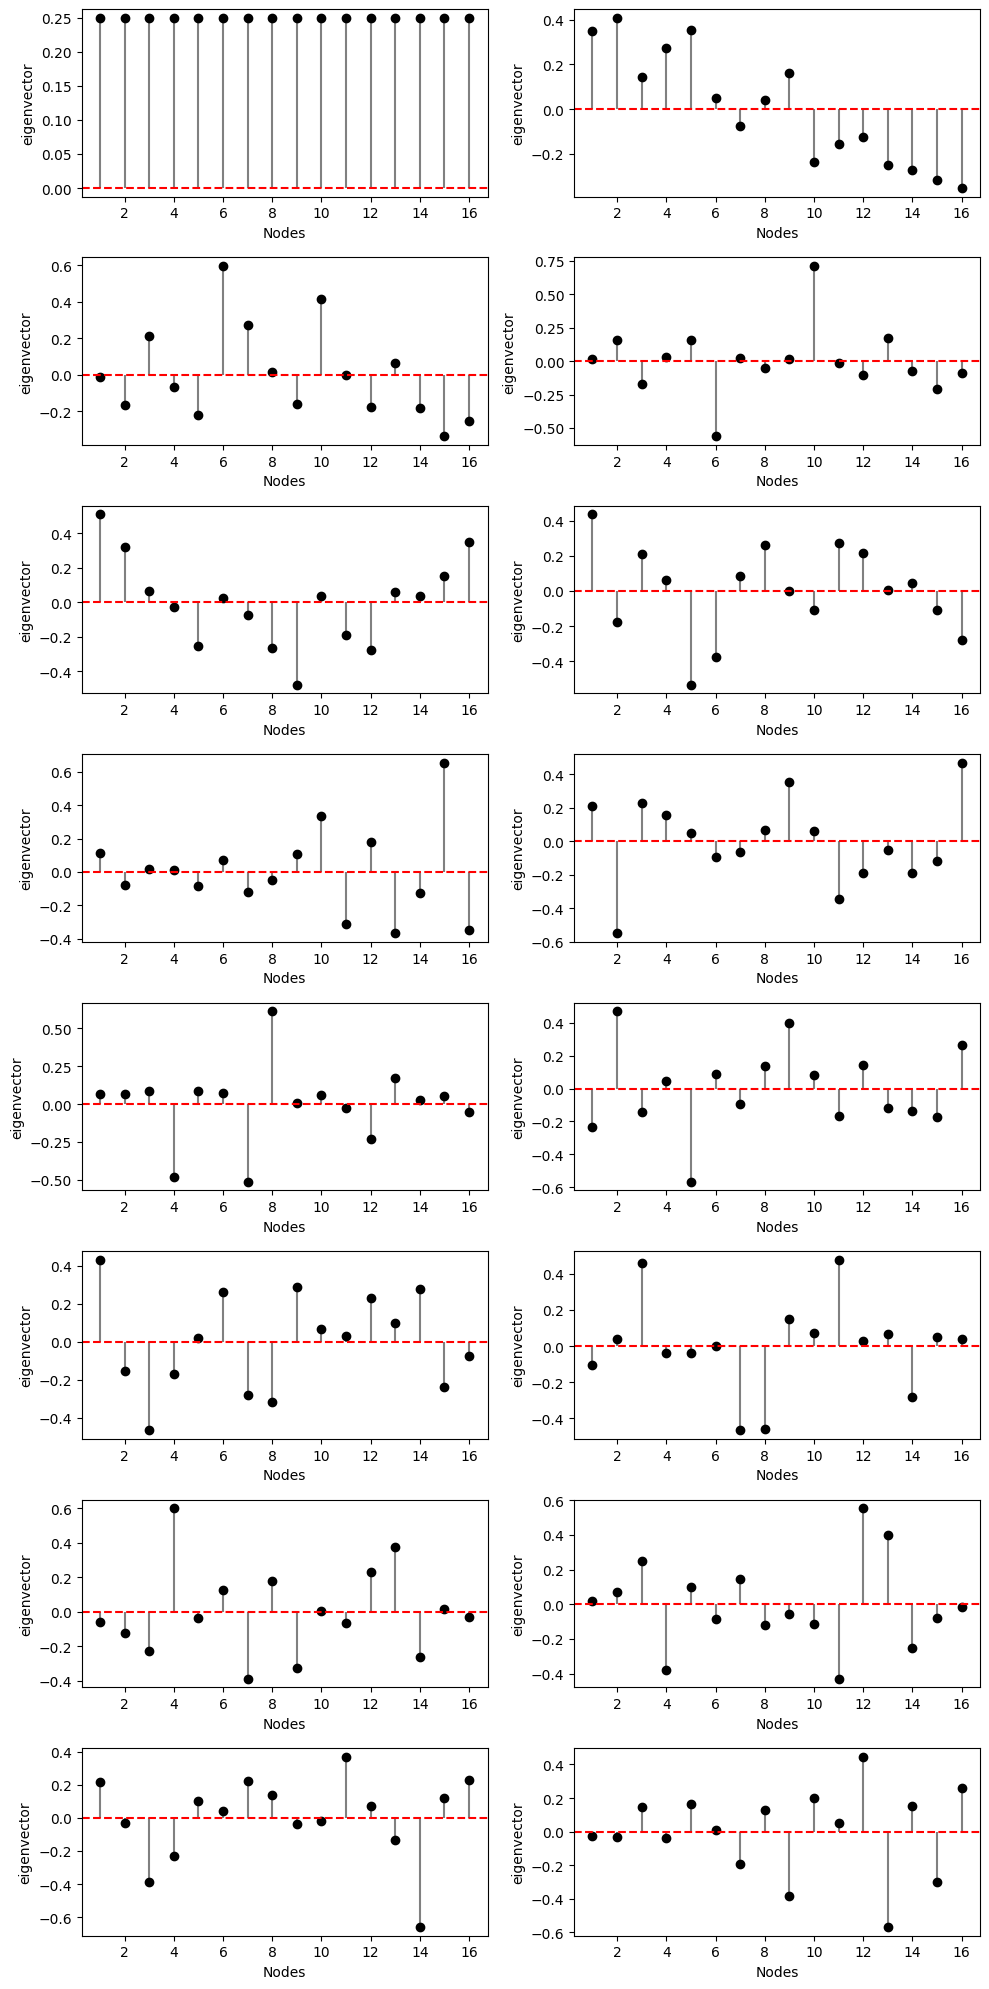

In [203]:
# Creating the stem plot
fig, axes = plt.subplots(8, 2, figsize=(10, 20))
axes = axes.flatten()
for i in range(16):
    axes[i].stem(nodes, eigenvectors[:, i], linefmt='gray', markerfmt='ko', basefmt=' ')
    axes[i].axhline(0, color='red', linestyle='--')

# Labeling the axes
for ax in axes:
    ax.set_xlabel('Nodes')
    ax.set_ylabel('eigenvector')

# Display the plot
plt.tight_layout()
plt.show()

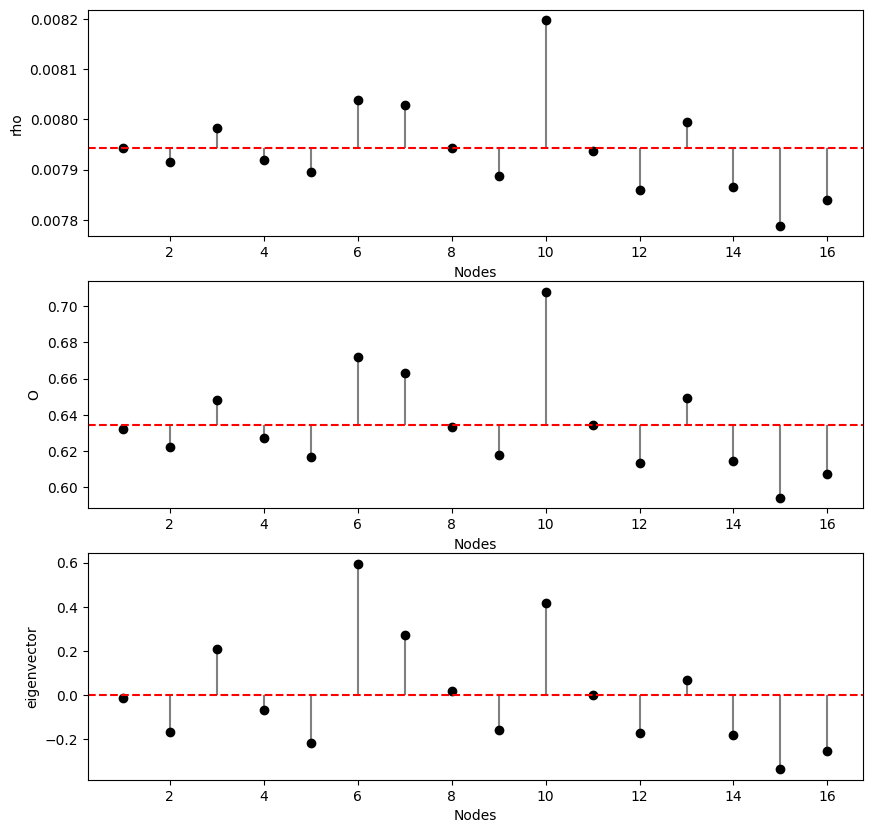

In [206]:
# Creating the stem plots
fig, axes = plt.subplots(3, 1, figsize=(10, 10))

axes[0].stem(nodes, last_values_rho, linefmt='gray', markerfmt='ko', basefmt=' ', bottom=rho_ss)
axes[0].axhline(rho_ss, color='red', linestyle='--')


# Labeling the axes
axes[0].set_xlabel('Nodes')
axes[0].set_ylabel('rho')

axes[1].stem(nodes, last_values_O, linefmt='gray', markerfmt='ko', basefmt=' ', bottom=O_ss)
axes[1].axhline(O_ss, color='red', linestyle='--')

# Labeling the axes
axes[1].set_xlabel('Nodes')
axes[1].set_ylabel('O')

axes[2].stem(nodes, eigenvectors[:, 2], linefmt='gray', markerfmt='ko', basefmt=' ')
axes[2].axhline(0, color='red', linestyle='--')

# Labeling the axes
axes[2].set_xlabel('Nodes')
axes[2].set_ylabel('eigenvector')

# Display the plot
plt.show()
